In [2]:
import os
base_path = 'Dataset/'
organ_num = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
print('total number of human and mosue organs:', len(organ_num))

total number of human and mosue organs: 31


In [3]:
from glob import glob                                 
img_path = "Dataset/*/tissue images/"  
img_num = glob('{}*{}'.format(img_path, 'png'))
# print('total number of images:', len(img_num))  

In [4]:
organ_names = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
organ_names.sort()
print('human and mouse organ names:')
organ_names

human and mouse organ names:


['human bladder',
 'human brain',
 'human cardia',
 'human cerebellum',
 'human epiglottis',
 'human jejunum',
 'human kidney',
 'human liver',
 'human lung',
 'human melanoma',
 'human muscle',
 'human oesophagus',
 'human pancreas',
 'human peritoneum',
 'human placenta',
 'human pylorus',
 'human rectum',
 'human salivory gland',
 'human spleen',
 'human testis',
 'human tongue',
 'human tonsile',
 'human umbilical cord',
 'mouse fat (white and brown)_subscapula',
 'mouse femur',
 'mouse heart',
 'mouse kidney',
 'mouse liver',
 'mouse muscle_tibia',
 'mouse spleen',
 'mouse thymus']

In [6]:
import pandas as pd
import numpy as np
from skimage.io import imread

num_img_per_organ = []
num_nuclei_per_organ = []
avg_nuclei_size_per_organ = []
num_nuclei_per_organ_without_vague = []
for i in range(len(organ_names)):
    organ_path = ''.join([base_path, organ_names[i], '/tissue images/'])
    num_img_per_organ.append(len(glob('{}*{}'.format(organ_path, 'png'))))
    label_mask_path = ''.join([base_path, organ_names[i], '/label masks modify/'])
    vague_mask_path = ''.join([base_path, organ_names[i], '/vague areas/mask binary/'])
    
    label_mask_name = glob('{}*{}'.format(label_mask_path, 'tif'))
    vague_mask_name = glob('{}*{}'.format(vague_mask_path, 'png'))
    
    label_mask_name.sort()
    vague_mask_name.sort()
    
    avg_nuclei_size_per_img = []
    nuclei_count_per_img = []
    nuclei_count_per_img_without_vague = []
    
    for j in range(len(label_mask_name)):
        label_mask = imread(label_mask_name[j])
        vague_mask = imread(vague_mask_name[j])
        
    
        label_mask_wo_vague = np.copy(label_mask)
        label_mask_wo_vague[vague_mask ==255] =0
        
        avg_nuclei_size_per_img.append(np.count_nonzero(label_mask)/(len(np.unique(label_mask))-1))
        nuclei_count_per_img.append(len(np.unique(label_mask))-1) # we do not count the background
        nuclei_count_per_img_without_vague.append(len(np.unique(label_mask_wo_vague))-1) # we do not count the background
        
    avg_nuclei_size_per_organ.append(np.round(np.mean(avg_nuclei_size_per_img),decimals = 2))
    num_nuclei_per_organ.append(np.sum(nuclei_count_per_img))
    num_nuclei_per_organ_without_vague.append(np.sum(nuclei_count_per_img_without_vague))
                                     
avg_nuclei_number_per_img = np.round(np.array(num_nuclei_per_organ)/np.array(num_img_per_organ), decimals=2)
vageu_percent = np.round(((np.array(num_nuclei_per_organ) - np.array(num_nuclei_per_organ_without_vague))/np.array(num_nuclei_per_organ)) *100, decimals=2)

organ_names[organ_names.index('mouse fat (white and brown)_subscapula')] = 'mouse fat' # just to have a clean table
    
df = pd.DataFrame({'organ':organ_names,
                   '#img':num_img_per_organ,
                   '#nuclei': num_nuclei_per_organ, 
                   '#avg nuclei/img': avg_nuclei_number_per_img,
                   'avg nuclei size': avg_nuclei_size_per_organ,
                   '#nuclei(W/O vague)': num_nuclei_per_organ_without_vague,
                   'vague (%)': vageu_percent})
df_no_indices = df.to_string(index=False)

print(df_no_indices)
print('======================')
print('total numebr of images: {}'.format(np.sum(num_img_per_organ)))
print('total numebr of nuclei: {}'.format(np.sum(num_nuclei_per_organ)))
print('total numebr of nuclei (vague excluded): {}'.format(np.sum(num_nuclei_per_organ_without_vague)))

organ_names[organ_names.index('mouse fat')] = 'mouse fat (white and brown)_subscapula' # geting back to real organ name


               organ  #img  #nuclei  #avg nuclei/img  avg nuclei size  #nuclei(W/O vague)  vague (%)
       human bladder    12      400            33.33           969.81                 348      13.00
         human brain    12      146            12.17           795.71                 113      22.60
        human cardia    12      671            55.92           698.02                 566      15.65
    human cerebellum    12      549            45.75           826.15                 466      15.12
    human epiglottis    11      228            20.73           562.65                 134      41.23
       human jejunum    10      874            87.40          1032.61                 782      10.53
        human kidney    11     1222           111.09          1014.75                1103       9.74
         human liver    40     1370            34.25          1384.50                1199      12.48
          human lung    11      318            28.91           763.15                 251  

human_salivory_14
human_peritoneum_12
human_testis_6
human_oesophagus_42


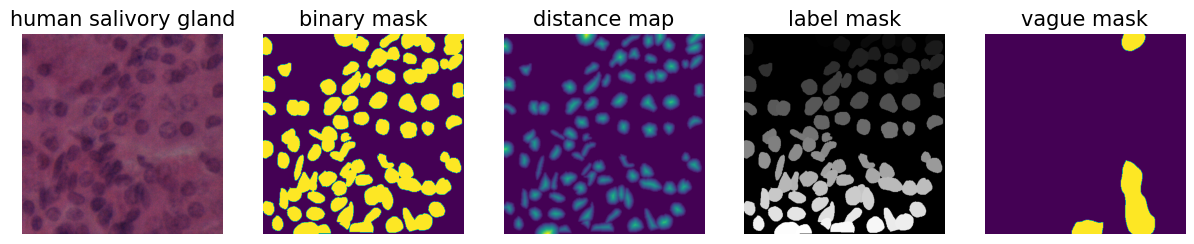

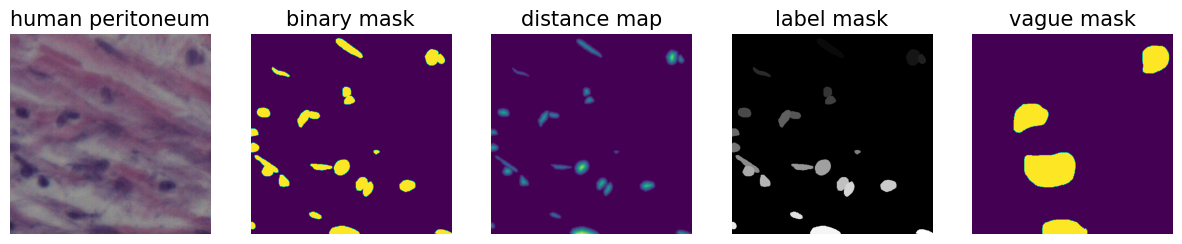

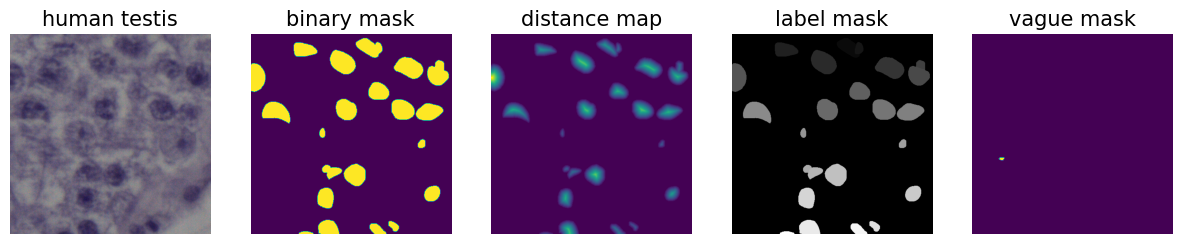

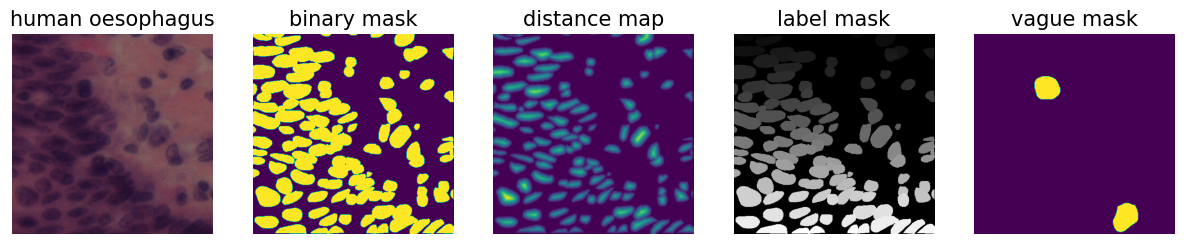

In [16]:
# 4 random samples for visualization
import matplotlib.pyplot as plt

for i in range(4):
    random_num1 = np.random.randint(len(organ_names))
    random_organ  = organ_names[random_num1]
    img_path = ''.join([base_path, random_organ, '/tissue images/'])
    img_list = glob('{}*{}'.format(img_path, 'png'))
    random_num2 = np.random.randint(len(img_list))
    img_name = img_list[random_num2].split('\\')[-1].split('.')[0]
    print(img_name)
    
    
    img = imread(''.join([base_path, random_organ, '/tissue images/', img_name,'.png']))
    img_binary_mask = imread(''.join([base_path, random_organ, '/mask binary/', img_name,'.png']))
    img_distace = imread(''.join([base_path, random_organ, '/distance maps/', img_name,'.png']))
    img_label_mask = imread(''.join([base_path, random_organ, '/label masks modify/', img_name,'.tif']))
    img_vageu_mask = imread(''.join([base_path, random_organ, '/vague areas/mask binary/', img_name,'.png']))
    
    plt.figure(figsize=(15,75))
    plt.subplot(1,5,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('{}'.format(random_organ[0:20]), fontsize = 15)
    
    plt.subplot(1,5,2)
    plt.imshow(img_binary_mask)
    plt.axis('off')
    plt.title('binary mask', fontsize = 15)
    
    plt.subplot(1,5,3)
    plt.imshow(img_distace)
    plt.axis('off')
    plt.title('distance map', fontsize = 15)
    
    
    plt.subplot(1,5,4) 
    plt.imshow(img_label_mask, cmap='gray')
    plt.axis('off')
    plt.title('label mask', fontsize = 15)
    
    plt.subplot(1,5,5)   
    plt.imshow(img_vageu_mask)
    plt.axis('off')
    plt.title('vague mask', fontsize = 15)